In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist["data"].to_numpy(), mnist["target"].to_numpy()
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

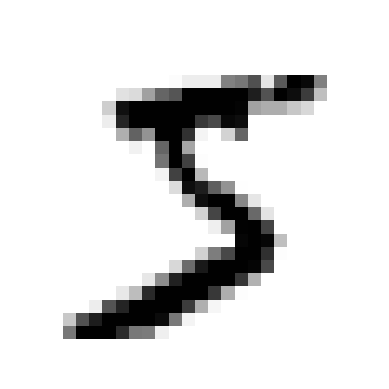

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [5]:
y = y.astype(np.uint8)

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [10]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [12]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [13]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [14]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")

In [15]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [16]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [17]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [18]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [19]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [20]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [22]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
method="predict_proba")

In [23]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

In [24]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [25]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [26]:
confusion_matrix(y_train_5, y_probas_forest)

array([[54534,    45],
       [  725,  4696]])

In [27]:
precision_score(y_train_5, y_probas_forest)

0.9905083315756169

In [28]:
recall_score(y_train_5, y_probas_forest)

0.8662608374838591

In [34]:
print(X_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [35]:
sgd_clf.fit(X_train, y_train)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [41]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [42]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [43]:
sgd_clf.predict([X_train[0]])

array([3], dtype=uint8)

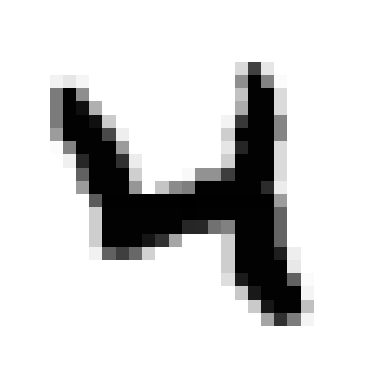

In [46]:
new_digit = X[20]
new_digit_image = new_digit.reshape(28, 28)

plt.imshow(new_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [47]:
sgd_clf.predict([new_digit])

array([4], dtype=uint8)

In [48]:
new_digit_scores = sgd_clf.decision_function([new_digit])
new_digit_scores

array([[-37730.15496568, -36531.51972281, -12043.25577843,
         -4463.43128958,   4586.88453098, -20173.68840643,
        -25192.01306184, -27171.7222659 ,  -6419.20172261,
        -18183.50854361]])

In [49]:
forest_clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [50]:
forest_clf.predict([some_digit])

array([5], dtype=uint8)

In [53]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [55]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [56]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [59]:
type(forest_clf)

sklearn.ensemble._forest.RandomForestClassifier

In [61]:
sgd_clf.fit(X_train, y_train)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [62]:
test_set_predictions = sgd_clf.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score

accuracy_score(test_set_predictions, y_test)

0.874

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_neighbors': [4, 5, 6, 7], 'weights' : ['uniform', 'distance']},
]

knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf, param_grid, cv=3, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"[{'n_neighbors': [4, 5, ...], 'weights': ['uniform', 'distance']}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_neighbors,4


In [68]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [69]:
grid_search.best_estimator_

,n_neighbors,4
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [70]:
testing_model = grid_search.best_estimator_
test_set_predictions = testing_model.predict(X_test)
accuracy_score(test_set_predictions, y_test)

0.9714

In [71]:
param_grid = [
    {'n_neighbors': [3, 4]},
]

knn_clf = KNeighborsClassifier(weights = 'distance')

grid_search = GridSearchCV(knn_clf, param_grid, cv=2, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)

,estimator,KNeighborsCla...ts='distance')
,param_grid,"[{'n_neighbors': [3, 4]}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,2
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_neighbors,4


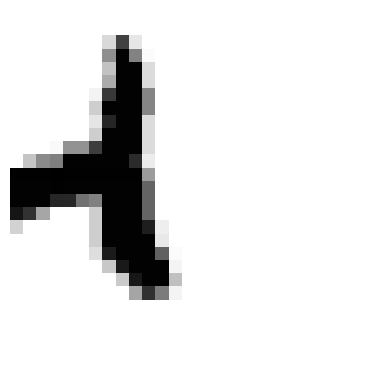

In [88]:
from scipy.ndimage import shift

shifted_new_digit = shift(new_digit.reshape(28,28), [-2, -10], cval=0)

plt.imshow(shifted_new_digit, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [108]:
X_t = X_train.copy()
y_t = y_train.copy()

In [90]:
def shift_image(image, num=0):
    match num:
        case 0:
            return shift(image.reshape(28,28), [0, -1], cval=0)
        case 1:
            return shift(image.reshape(28,28), [0, 1], cval=0)
        case 2:
            return shift(image.reshape(28,28), [1, 0], cval=0)
        case 3:
            return shift(image.reshape(28,28), [-1, 0], cval=0)

def get_shifted_image(image, num=0):
    return shift_image(image, num).reshape(784)

In [117]:
import numpy as np

for x in range(1000):
    for num in range(4):
        X_t = np.append(X_t, [get_shifted_image(X_t[x], num)], axis=0)
        y_t = np.append(y_t, y_t[x])

In [118]:
X_t

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(64000, 784))

In [119]:
y_t

array([5, 0, 4, ..., 6, 6, 6], shape=(64000,), dtype=uint8)

In [120]:
knn_clf = KNeighborsClassifier(weights = 'distance', n_neighbors = 4)
knn_clf.fit(X_t, y_t)

,n_neighbors,4
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [121]:
test_set_predictions = knn_clf.predict(X_test)
accuracy_score(test_set_predictions, y_test)

0.9713